Автоэнкодеры. Что это и как работают | #27 нейросети на Python

In [17]:

import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.layers import Dense, SimpleRNN, Input, Embedding,LSTM, GRU, Flatten, Dropout, Bidirectional, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [19]:
input_img = Input((28, 28, 1))

x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)

d = Dense(64, activation='relu')(encoded)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

autoencoder = keras.Model(input_img, decoded, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
batсh_size = 100

autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=batсh_size,
    shuffle=True,
)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0738
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1043
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1002
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0980
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0973
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0980
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0980
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0983
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0978
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0975
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0972
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0965
Epoch 13/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0968
Epoch 14/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0964
Epoch 15/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


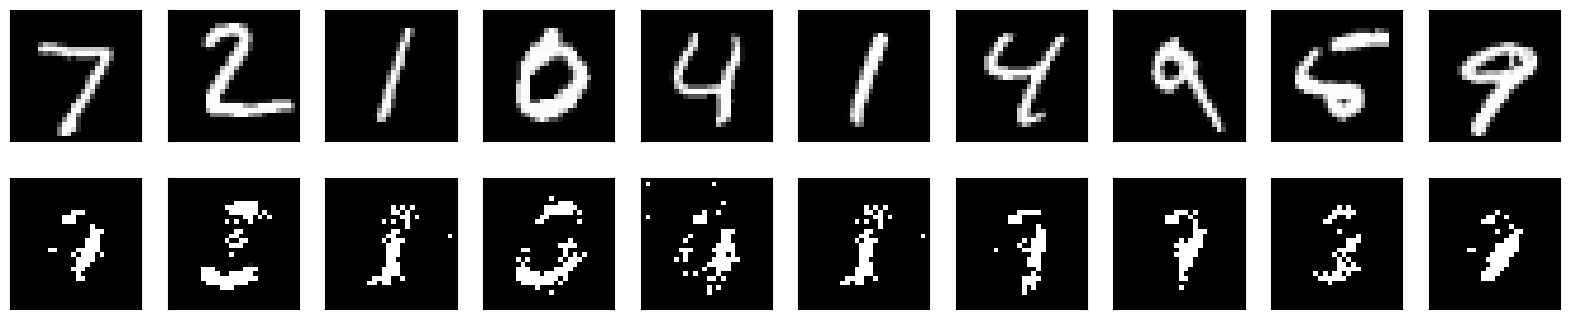

In [21]:
n = 10 
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n*2, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax2 = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

In [32]:
def plot_digit(*images):
        images = [x.squeeze() for x in images]
        n = images[0].shape[0]

        plt.figure(figsize=(n,1))
        for j in range(n):
            ax = plt.subplot(1, n , j + 1)
            plt.imshow(images[0][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

plt.show()

In [33]:
def plot_homotopy(frm, to, n = 10, autoencoder= None):
    z = np.zeros(([n] + list(frm.shape)))
    for i , t in enumerate(np.linspace(0.,1.,n)):
        z[i] = frm * (1-t) + to * t 
    if autoencoder:
        plot_digit(autoencoder.predict(z, batch_size=n))
    else:
        plot_digit(z)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


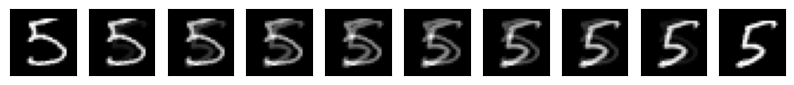

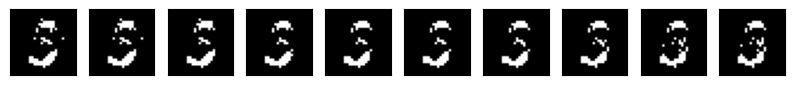

In [34]:
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)